## Table of Contents:
* [Introduction](#intro)
* [Basic Data Wrangling](#wrangling)
    * [Shape of the dataframe](#shape)
    * [Convert columns to appropriate data types](#d_types)
    * [Understand the data and how it's distributed](#data)
    * [Remove redundant columns](#redundant)
    * [Deal with nulls](#nulls)
* [Basic EDA](#basic_eda)
    * [Explore the relationship between mosquito number and date](#num_vs_date)
* [Advanced EDA](#adv_eda)
    * [Explore the relationship between mosquito species and WNV prevalence](#species_vs_WNV)
    * [Explore the relationship between number of mosquitos caught and trap type](#num_vs_trap)
    * [Explore the relationship between ](#st)
* [Basic Analysis](#analysis)
    * [Prepare data for analysis](#prep)
    * [Average number of mosquitoes per month](#avg)
* [Statistical Analysis](#stat_analysis)
    * [Determine difference of WNV occurrence between varying mosquito species](#stat_sig)
    * [Determine columns that are positively/negatively correlated with number of mosquitoes caught](#corr)
* [Advanced Statistical Analysis](#adv_stat_analysis)
    * [Linear regression to determine how independent variables affect number of mosquitoes caught](#lin_reg)
    * [Logistic regression to determine how independent variables affect WNV presence](#log_reg)
* [Conclusion](#conc)

## Introduction <a class="anchor" id="intro"></a>

West Nile Virus (WNV) is a viral illness largely spread by mosquitoes. The City of Chicago, Illinois has been keeping track of mosquito populations and WNV prevalence using a series of traps that they place around the city. The goal is to use this dataset to study the captured specimens and evaluate the state of WNV spread in the city.

## Basic Data Wrangling <a class="anchor" id="wrangling"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading in the data
mosquitodf = pd.read_csv('mosquito_data.csv')

In [3]:
mosquitodf.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


### What is the shape of the dataframe? <a class="anchor" id="shape"></a>

In [4]:
mosquitodf.shape 

(18495, 13)

### Convert columns to appropriate data types <a class="anchor" id="d_types"></a>

In [5]:
mosquitodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


In [6]:
mosquitodf['Date'] = mosquitodf['Date'].astype('datetime64[ns]')

In [7]:
mosquitodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


### Understand the data and how it's distributed <a class="anchor" id="data"></a> 

In [8]:
mosquitodf.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [12]:
mosquitodf['Year'].value_counts().sort_index()

Year
2007    2141
2008     984
2009    1135
2010    1397
2011    1120
2012    1392
2013    1624
2014    2000
2015    1178
2016    1844
2017    1110
2018    1361
2019    1209
Name: count, dtype: int64

In [11]:
mosquitodf['Week'].value_counts().sort_index()

Week
20      29
21      78
22     129
23     603
24     802
25     791
26     792
27     946
28    1223
29    1277
30    1442
31    1596
32    1662
33    1595
34    1300
35    1113
36     972
37     840
38     664
39     594
40      47
Name: count, dtype: int64

In [13]:
mosquitodf['Address Block'].value_counts()

Address Block
100XX W OHARE AIRPORT       2039
41XX N OAK PARK AVE          408
101XX S STONY ISLAND AVE     369
52XX S KOLMAR AVE            349
1XX N CENTRAL PARK DR        335
                            ... 
29XX N KENNETH AVE             2
54XX W PARKER AVE              1
4XX W 127TH ST                 1
104XX S OGLESBY AVE            1
21XX S HAMLIN AVE              1
Name: count, Length: 154, dtype: int64

In [18]:
mosquitodf['Block'].value_counts().sort_index()

Block
1      335
2       54
3      270
4      561
5      495
      ... 
122     14
127    299
129      5
131    356
132     11
Name: count, Length: 87, dtype: int64

<Axes: ylabel='Frequency'>

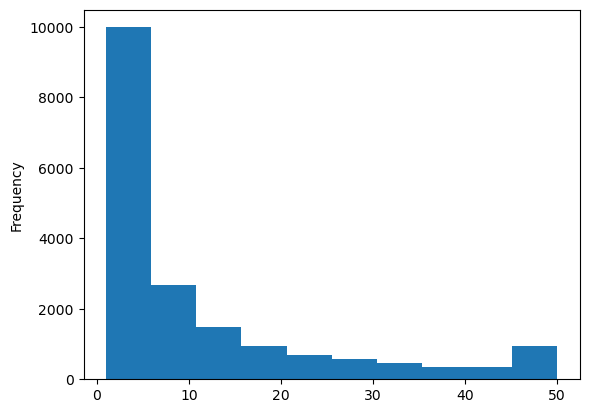

In [10]:
mosquitodf['Mosquito number'].plot(kind='hist')

In [11]:
# The Block column stores the block number of the address

mosquitodf['Block'].value_counts()

100    2265
22      715
58      636
70      629
52      577
       ... 
80        5
29        2
112       2
88        2
54        1
Name: Block, Length: 87, dtype: int64

<Axes: ylabel='Frequency'>

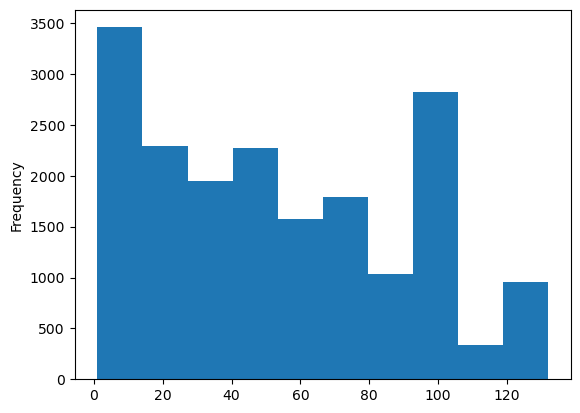

In [12]:
mosquitodf['Block'].plot(kind='hist')

In [13]:
# The column Trap type lists the kind of trap used

mosquitodf['Trap type'].value_counts()

GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: Trap type, dtype: int64

<Axes: >

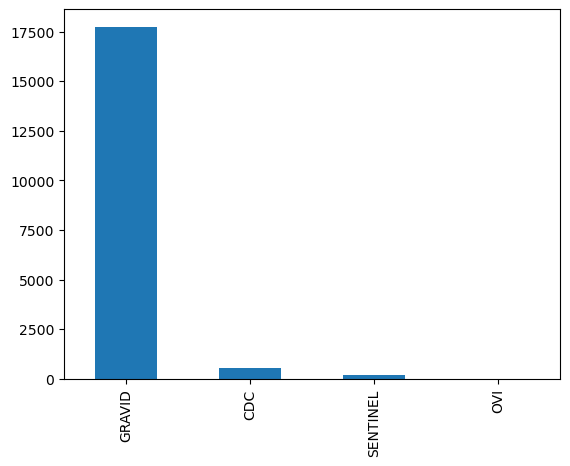

In [14]:
mosquitodf['Trap type'].value_counts().plot(kind='bar')

In [15]:
# The column WNV Present indicates whether or not west nile virus was present in the caught mosquitos

mosquitodf['WNV Present'].value_counts()

negative    14501
positive     3994
Name: WNV Present, dtype: int64

<Axes: ylabel='WNV Present'>

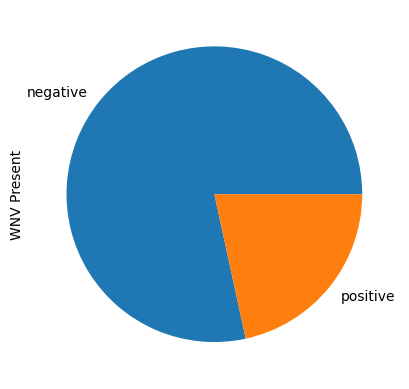

In [16]:
mosquitodf['WNV Present'].value_counts().plot(kind='pie')

### Part 1 Question 4   
#### Are there any columns that contain duplicate information? If so, remove the redundant columns.

In [17]:
# the Mosquito ID column contains the same information as the Species column, so that column can be dropped

mosquitodf.drop(columns = 'Mosquito ID', inplace = True)

In [18]:
# sanitiy check - the Mosquito ID column is gone now

mosquitodf.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049


In [19]:
# there are some other columns where the information is technically redundant, like Block or Year, but they could be useful so I'll leave them

### Part 1 Question 5   
#### Are there any null values in the dataframe? If so, deal with them appropriately.

In [20]:
mosquitodf.isnull().sum()

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
WNV Present           0
Species               0
Lat                2924
Lon                2924
dtype: int64

In [30]:
# the only null values are found in the latitude and longitude columns 
# I want to see if I can find which blocks/addresses are listed in those rows to then see if I can infer the latitudes and longitudes
# using the latitude column to filter, I can find all the columns with null values (2,924)

mosquitodf.loc[mosquitodf['Lat'].isnull(), :]

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
44,2019,38,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-19 00:09:00,3,negative,CULEX RESTUANS,NaN,NaN
55,2019,38,100XX W OHARE AIRPORT,100,T905,GRAVID,2019-09-19 00:09:00,2,negative,CULEX TERRITANS,NaN,NaN
57,2019,38,100XX W OHARE AIRPORT,100,T905,GRAVID,2019-09-19 00:09:00,4,negative,CULEX RESTUANS,NaN,NaN
93,2019,37,100XX W OHARE AIRPORT,100,T905,GRAVID,2019-09-12 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18476,2013,29,100XX W OHARE AIRPORT,100,T912,GRAVID,2013-07-19 00:07:00,46,positive,CULEX RESTUANS,NaN,NaN
18477,2013,35,100XX W OHARE AIRPORT,100,T906,GRAVID,2013-08-29 00:08:00,50,positive,CULEX PIPIENS,NaN,NaN
18486,2016,29,100XX W OHARE AIRPORT,100,T911,GRAVID,2016-07-21 00:07:00,47,positive,CULEX RESTUANS,NaN,NaN
18488,2017,30,100XX W OHARE AIRPORT,100,T900,GRAVID,2017-07-27 00:07:00,17,positive,CULEX RESTUANS,NaN,NaN


In [29]:
# this is the list of the address blocks that correspond to null latitude and longitude

mosquitodf.loc[mosquitodf['Lat'].isnull(), :]['Address Block'].unique()

array(['100XX W OHARE AIRPORT', '4XX W 127TH', '100XX W OHARE',
       '81XX S ASHLAND', '79XX S CHICAGO', '98XX S AVENUE G',
       '65XX N OAK PARK AVE', '115XX S AVENUE L', '30XX S HOYNE',
       '43XX N ASHLAND'], dtype=object)

In [42]:
mosquitodf[mosquitodf['Block'] == 79].isnull().sum()

Year                 0
Week                 0
Address Block        0
Block                0
Trap                 0
Trap type            0
Date                 0
Mosquito number      0
WNV Present          0
Species              0
Lat                136
Lon                136
dtype: int64

After checking through some of the addresses and blocks listed above it seems that all instances of those addresses correspond to null latitude and longitude values, and so I don't think I can infer the values for those columns. Since I won't need the latitude or longitude for the rest of the analysis, I'll just drop the columns.

In [48]:
mosquitodf.drop(columns = 'Lat', inplace = True)
mosquitodf.drop(columns = 'Lon', inplace = True)

In [49]:
# checking they're gone

mosquitodf.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS


### Part 2 Question 1     
#### Using an appropriate visual, or visuals, explore the relationship between mosquito number and date.

<Axes: xlabel='Year'>

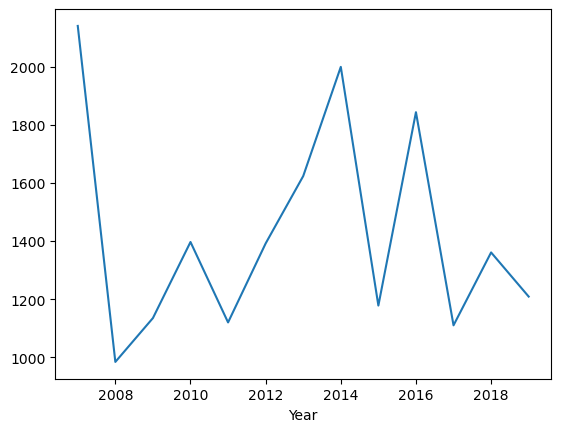

In [55]:
mosquitodf.groupby(['Year'])['Mosquito number'].count().plot()

<Axes: xlabel='Date'>

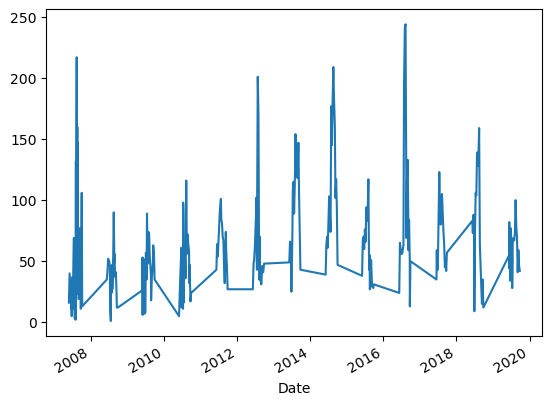

In [56]:
mosquitodf.groupby(['Date'])['Mosquito number'].count().plot()

### Part 3 Question 1    
#### Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.

<Axes: xlabel='Species'>

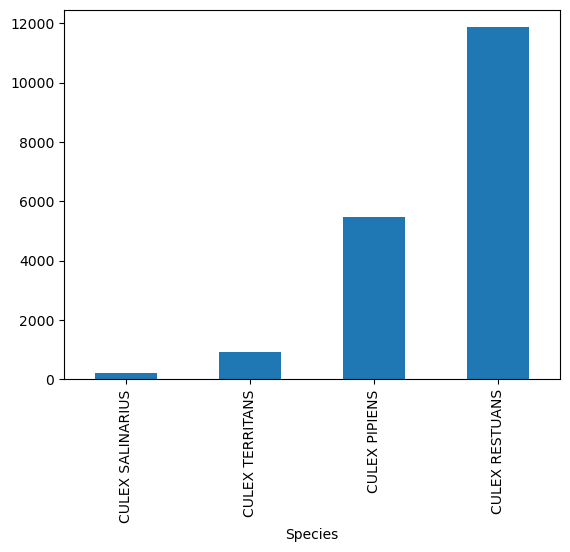

In [78]:
mosquitodf.groupby(['Species'])['WNV Present'].count().sort_values().plot(kind='bar')

<Axes: ylabel='Species'>

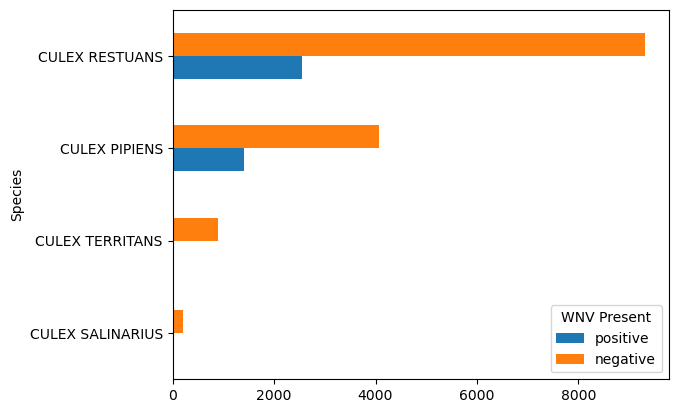

In [80]:
mosquitodf.groupby(['Species', 'WNV Present'])['WNV Present'].count().unstack()[['positive', 'negative']].sort_values('positive').plot(kind='barh')

### Part 3 Question 2     
#### Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.    
#### Note: This visual should be a different type of visualization than the previous one.

<Axes: ylabel='Mosquito number'>

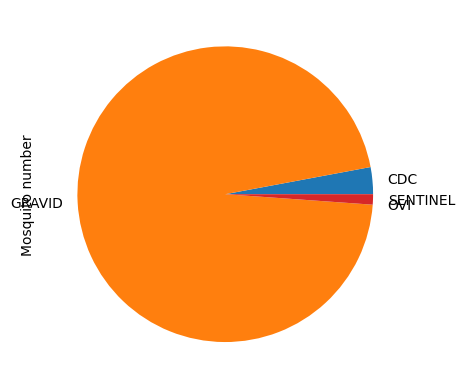

In [83]:
mosquitodf.groupby(['Trap type'])['Mosquito number'].count().plot(kind='pie')

<Axes: ylabel='Trap type'>

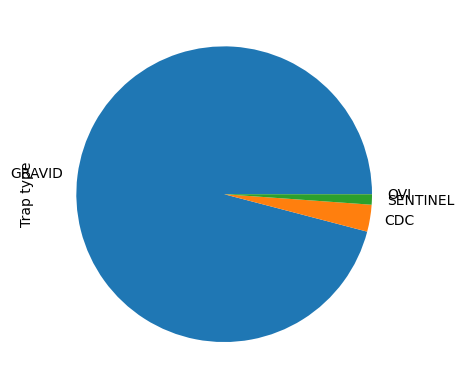

In [84]:
mosquitodf['Trap type'].value_counts().plot(kind='pie')

### Part 3 Question 3     
#### Using an appropriate visual, come up with an additional insight of your choice.   
#### Note: This visual should be a different type of visualization than the previous two

In [154]:
# I want to see the distribution of mosquitos by block, and the distribution of positive WNV mosquitos by block

<Axes: ylabel='Block'>

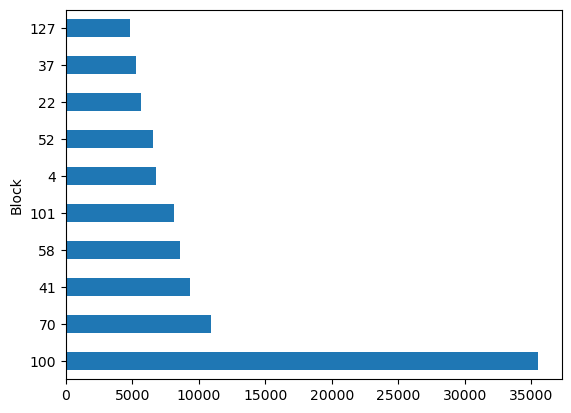

In [153]:
# top 10 blocks with the most mosquitos

mosquitodf.groupby(['Block'])['Mosquito number'].sum().sort_values(ascending=False)[:10].plot(kind='barh')

<Axes: >

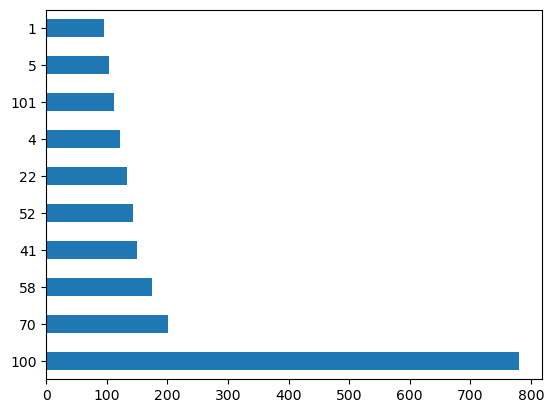

In [152]:
# top 10 blocks with the most counts of WNV being present 

mosquitodf[mosquitodf['WNV Present'] == 'positive']['Block'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh')

<Axes: ylabel='Block'>

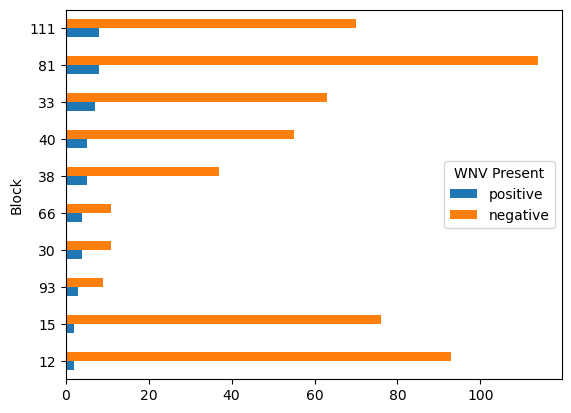

In [156]:
mosquitodf.groupby(['Block', 'WNV Present'])['WNV Present'].count().unstack()[['positive', 'negative']].sort_values('positive')[:10].plot(kind='barh')